In [1]:
import requests 
from selenium import webdriver as wd 
from selenium.webdriver.common.by import By 
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC
import time
import random
import re
import pandas as pd
import json # import json module
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
with open('제로콜라.json') as json_file:
    json_data = json.load(json_file)

In [3]:
df = pd.DataFrame(json_data['data'])

In [4]:
df

,index,Post,Hashtags,Locates,Date,Likes
0,0,[[오백열 번째 호기심까까]\n-\n노브랜드버거 펩시맥스(0kcal)⭐1500원\n...,"[노브랜드버거, nobrandburger, 노브랜드, 펩시맥스, 펩시, 제로콜라, ...",[],2020년 6월 19일,"[10,542]"
1,1,[꽂히면 질릴 때까지 하나만 파는 서타일😉...,"[제로콜라, 노을, 노을맛집, 노을사진, 가을, 가을하늘, 하늘사진, 하늘...",[김녕해수욕장],2020년 10월 20일,[682]
2,2,[🌸이틀연속 뷰맛집 불암산🌸\n⠀\n난이도:★☆☆☆☆\n소요시간: 1시간 30분\n...,"[등산일기, 와사비불암산]",[불암산정상],2020년 7월 12일,"[3,088]"
3,3,[배부른 일요일\n주말엔 맛있는거 먹어ᄋ...,"[주말, 여성의류, 수입의류, 붓기, 안녕, 아침, 붓기안녕, 다이어트, 반지, 아...",[광주신세계백화점],2020년 9월 27일,"[2,087]"
4,4,"[이러다 몸짱되면 어떡하지,,,,,,✨\n\n#다이어트식단 #제로콜라 #최고]","[다이어트식단, 제로콜라, 최고]",[],2020년 7월 3일,[435]
...,...,...,...,...,...,...
4672,4672,[식단이라 우겨본다\n.\n.\n.\n.\n#패스트푸드 #와퍼 #소스없이 #식단 #...,"[패스트푸드, 와퍼, 소스없이, 식단, 식단그램, 식단일기, 식단인증, 제로콜라, ...",[],2019년 1월 27일,[45]
4673,4673,[.\n190126/토\n.\n13일차식단!\n.\n배부른 다이어트!\n배부른 시합...,"[subway, 9가지곡물빵30cm, 소스는, 올리브오일, 후추, 소금, 제로콜라,...",[용인 동백동],2019년 1월 27일,[23]
4674,4674,[#190125 #다이어트\n오늘도 열심히 살았습니다:)\n하루종일 입맛이 없어서 ...,"[190125, 다이어트, 다이어터, 다이어트식단, 배고파, 닭가슴살, 계란, 제로...",[],2019년 1월 25일,[19]
4675,4675,"[#첫줄\n콜라 없이 햄버거, 햄버거 남기기\n.\n.\n#역시 #햄버거는 #버거킹...","[첫줄, 역시, 햄버거는, 버거킹, 불고기롱치킨, 몬스터와퍼, 세트, 프렌치프라이,...",[],2019년 1월 24일,[18]


# Hashtags 분석

# 1. Word Cloud

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

In [6]:
tags = [element for array in list(df.Hashtags) for element in array]

In [7]:
tags[0:5]

['노브랜드버거', 'nobrandburger', '노브랜드', '펩시맥스', '펩시']

In [48]:
sd_stop_words = ['error','펩시','코카콜라','pepsi','강다니엘','kangdaniel','마운틴듀','스프라이트','제로콜라', \
                'parkbogum', '박보검', '朴寶劍', '姜丹尼尔','パクボゴム','청춘기록','คโบกอม', 'ยล', 'ยล',\
                'งแดเน', 'カンダニエル', '콜라', '에이스침대', '서복', 'bogummy', 'danity', 'bluebird', \
                'bogum', 'bloomin', '보검복지부', '박보검팬미팅', '블루버드', '영화서복', '지코', '다니티', \
                'dearmyfriend','tvn드라마', 'starship', 'cocacola', 'tvn월화드라마', '커넥트엔터테인먼트', \
                'pepsixstarship', '사혜준', 'zico', 'cyan', 'cola', '2u', 'fortheloveofit', 'fortheloveof대한민국', \
                'puma', '펩시콘서트', 'allmylove', 'mountaindew', '드라마', '코카콜라', '코카콜라', '사이언', \
                'coke', '푸마','朴宝剑', 'tvn', '나랑드사이다', '나랑드사이다', \
                '일상', 'daily', '데일리', \
                 '좋아요', '소통', '맞팔', '선팔', '푸마', 'coke', '팔로우']

In [49]:
cv = CountVectorizer(max_features=10000, stop_words = sd_stop_words)

In [50]:
tdm = cv.fit_transform(tags)

In [51]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat 
})

In [52]:
word_count.sort_values('빈도', ascending=False).head(15)

,단어,빈도
1558,다이어트,752
2189,먹스타그램,574
9268,햄버거,335
1546,다이어터,301
2077,맛스타그램,290
1589,다이어트식단,290
1616,다이어트콜라,289
875,제로콜라,281
6560,제로칼로리,265
8256,톡별콜라,255


In [53]:
wc = WordCloud(background_color='white',
               width=800, height=800, 
               font_path='NanumBarunGothicLight.ttf',
              colormap = 'hsv', # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
              max_words = 200)

In [54]:
count_dic = word_count.set_index('단어')['빈도'].to_dict()
cloud = wc.fit_words(count_dic)

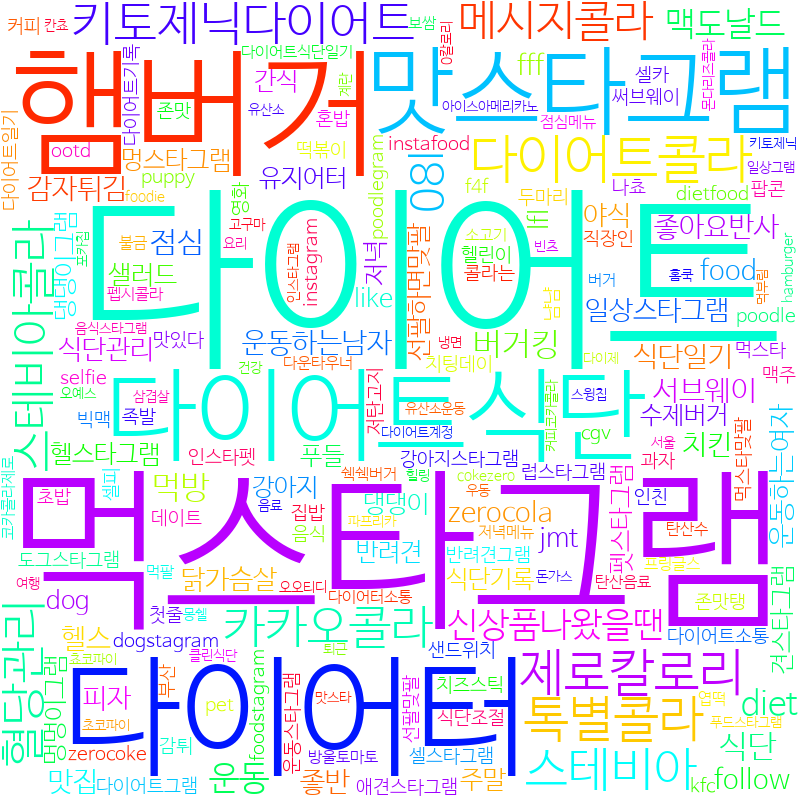

In [55]:
cloud.to_image()

# 2. Embedding

### - LSA

### - tags

In [16]:
tdm.shape

(68163, 10000)

In [17]:
# one hot encoding
import numpy as np

one_hot = np.eye(10000)

In [18]:
words = cv.get_feature_names()

In [19]:
tokens = tags

In [20]:
%%time
doc = np.zeros((1, 10000))

for token in tokens:
    try:
        i = words.index(token)
        doc += one_hot[i]
    except ValueError:
        pass

Wall time: 10.7 s


In [21]:
from sklearn.decomposition import TruncatedSVD

In [22]:
svd = TruncatedSVD(n_components=1000)

In [23]:
svd.fit(tdm)

TruncatedSVD(algorithm='randomized', n_components=1000, n_iter=5,
             random_state=None, tol=0.0)

In [24]:
svd.components_.shape

(1000, 10000)

In [25]:
word_emb = svd.components_.T

In [26]:
indices = []
target = list(word_count.sort_values('빈도', ascending=False)['단어'][0:100])
for w in target:
    i = words.index(w)
    indices.append(i)
    print(w, i)

다이어트 1560
일상 6514
먹스타그램 2193
소통 3187
햄버거 9268
맞팔 2120
좋아요 6730
다이어터 1548
맛스타그램 2080
다이어트식단 1591
다이어트콜라 1618
제로콜라 877
제로칼로리 6666
톡별콜라 8055
키토제닉다이어트 7783
스테비아 3654
카카오콜라 7110
스테비아콜라 3656
혈당관리 9506
데일리 1792
메시지콜라 2227
08l 3
신상품나왔을땐 4035
daily 171
운동 6215
맥도날드 2144
diet 186
버거킹 2492
식단 3884
먹방 2183
점심 6639
서브웨이 2825
맛집 2103
헬스 9424
좋반 6724
감자튀김 1054
치킨 7010
좋아요반사 6734
운동하는남자 6284
식단일기 3902
선팔 2911
fff 242
food 257
운동하는여자 6295
피자 8834
닭가슴살 1665
일상스타그램 6521
follow 248
식단관리 3887
야식 4818
zerocola 597
선팔하면맞팔 2924
lfl 391
jmt 345
샐러드 2805
주말 6748
저녁 6596
헬스타그램 9446
팔로우 8337
like 395
유지어터 6373
다이어트 640
수제버거 3369
식단기록 3889
강아지 1076
멍스타그램 2215
반려견 2402
간식 1024
댕댕이 1748
펫스타그램 8449
댕댕이그램 1749
푸들 8623
멍멍이그램 2214
견스타그램 1134
dog 203
강아지스타그램 1078
puppy 497
dogstagram 204
반려견그램 2403
poodle 489
poodlegram 490
애견스타그램 4728
도그스타그램 1799
인스타펫 6477
pet 474
두마리 1857
f4f 231
다이어트그램 1565
먹스타 2192
셀스타그램 3071
selfie 515
커피 7252
ootd 465
샌드위치 2803
헬린이 9417
혼밥 9599
셀카 3072
dietfood 191
다이어트소통 1586
떡볶이 1905


In [27]:
word_emb = svd.components_.T

In [28]:
from adjustText import adjust_text
from matplotlib import pyplot
from matplotlib import font_manager, rc

In [29]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name)

Wall time: 45.9 s


48

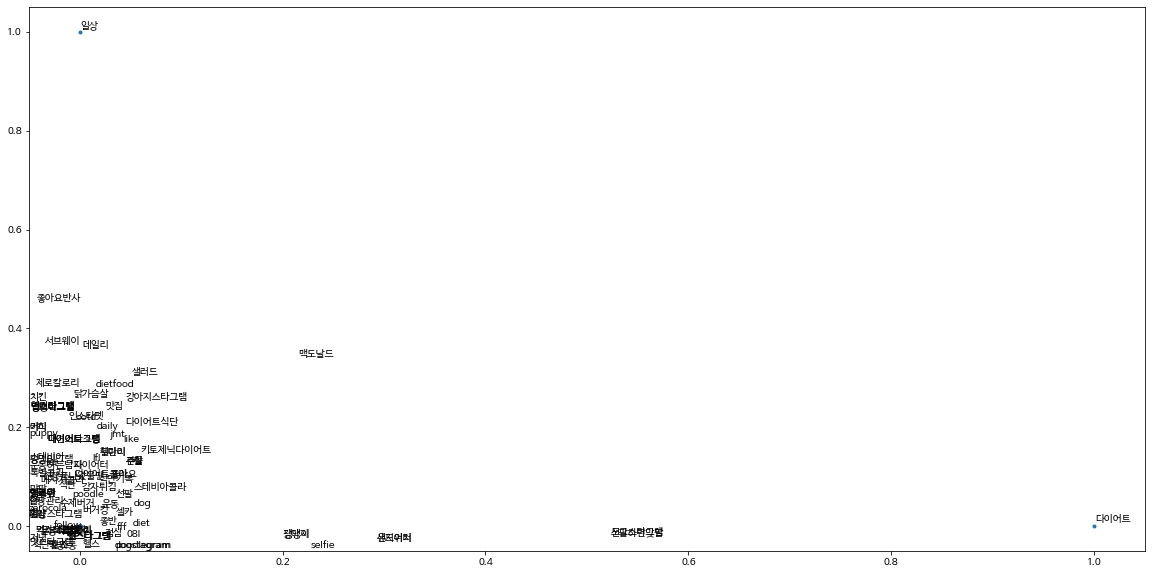

In [30]:
%%time

comp1 = 0
comp2 = 1

pyplot.rcParams["figure.figsize"] = (20,10)
pyplot.plot(word_emb[indices, comp1], word_emb[indices, comp2], '.')


texts = [pyplot.text(word_emb[i, comp1], word_emb[i, comp2], w) for i, w in zip(indices, target)]

adjust_text(texts)

### - T-SNE

In [31]:
from sklearn.manifold import TSNE

In [32]:
tsne = TSNE()

In [33]:
%%time
pos = tsne.fit_transform(word_emb)

Wall time: 9min 38s


180

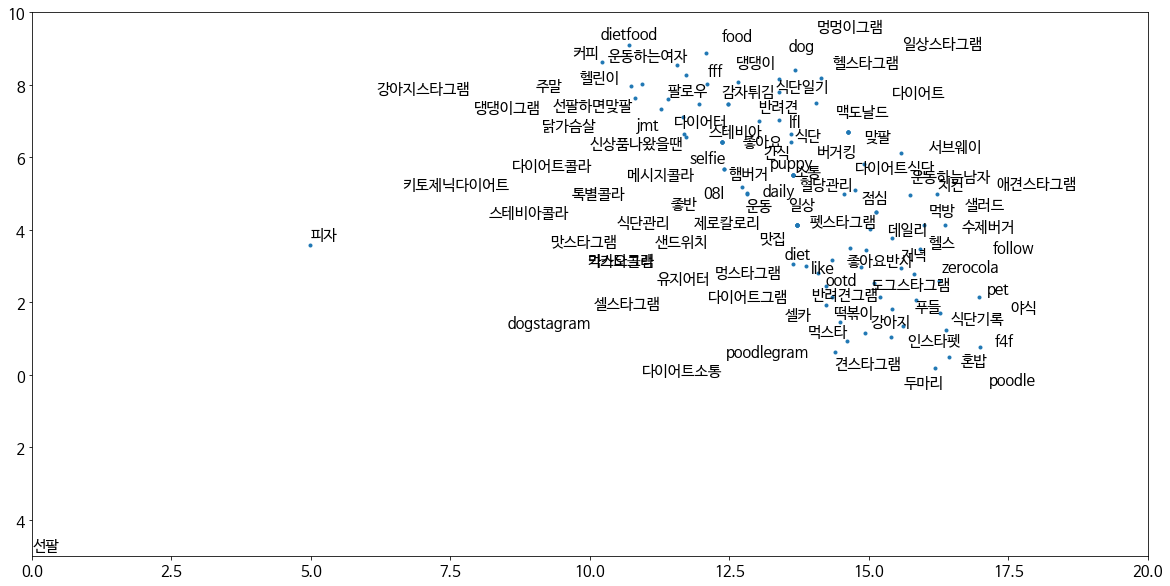

In [42]:
pyplot.rcParams["figure.figsize"] = (20,10)

pyplot.plot(pos[indices, 0], pos[indices, 1], '.')

pyplot.xlim(0,20)
pyplot.ylim(-5, 10)

texts = [pyplot.text(pos[i, 0], pos[i, 1], w) for i, w in zip(indices, target)]

adjust_text(texts)

### - Word2Vec

In [35]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from sklearn.decomposition import PCA

In [36]:
sentences = list(df['Hashtags'])

In [43]:
model = Word2Vec(sentences, size = 1000, min_count = 100, workers = 4, window = 100) # negative, sg

In [44]:
word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

In [45]:
pca = PCA(n_components = 2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

In [46]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name, size = 15)

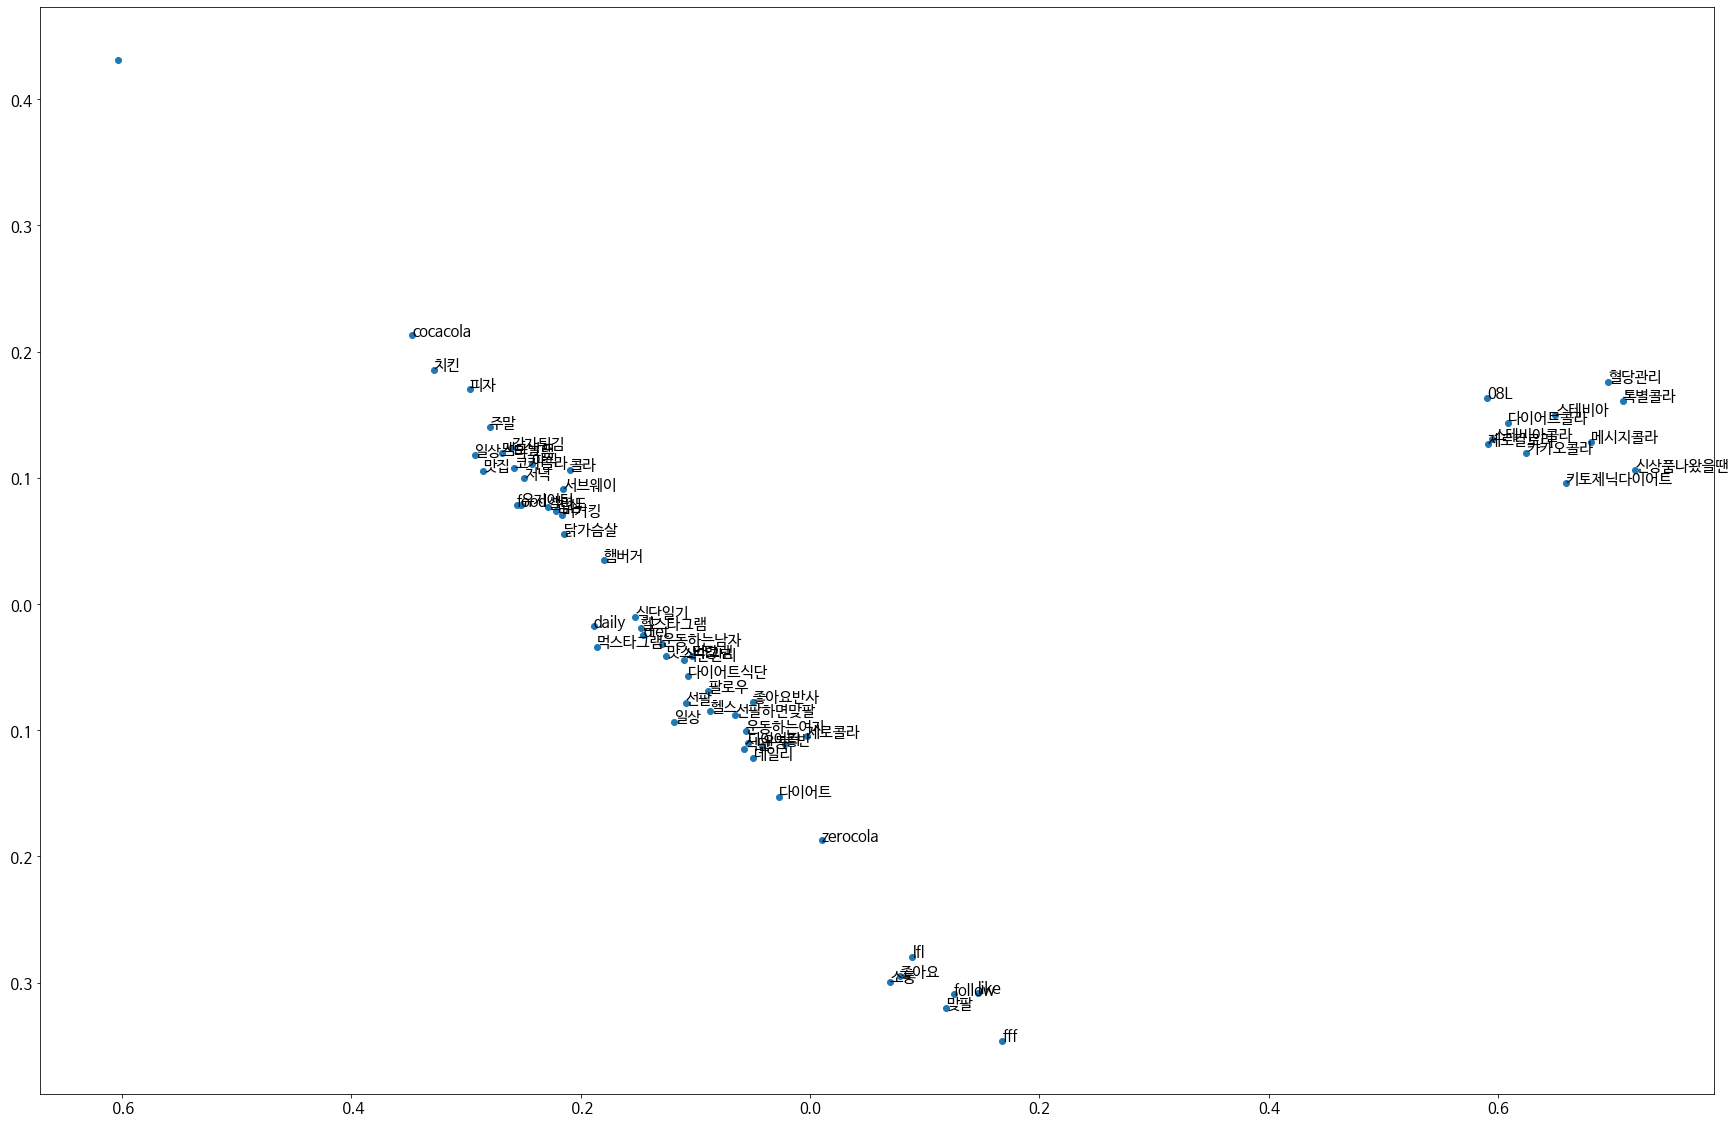

In [47]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [30, 20]
plt.scatter(xs, ys)
for i,v in enumerate(vocabs):
    plt.annotate(v, xy = (xs[i], ys[i]))

# Location 분석

## - Word Cloud

In [42]:
locates = [element for array in list(df.Locates) for element in array]

In [43]:
monster_lc_stop_words = ['error','','south','korea']
cv = CountVectorizer(max_features=10000, stop_words = monster_lc_stop_words)
tdm = cv.fit_transform(locates)
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat 
})

In [44]:
word_count.sort_values('빈도', ascending=False).head()

,단어,빈도
1569,seoul,1101
296,busan,239
955,jeju,198
4688,어딘가,197
530,do,191


In [45]:
wc = WordCloud(background_color='white',
               width=800, height=800, 
               font_path='NanumBarunGothicLight.ttf',
              colormap = 'hsv', # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
              max_words = 200)

In [46]:
count_dic = word_count.set_index('단어')['빈도'].to_dict()
cloud = wc.fit_words(count_dic)

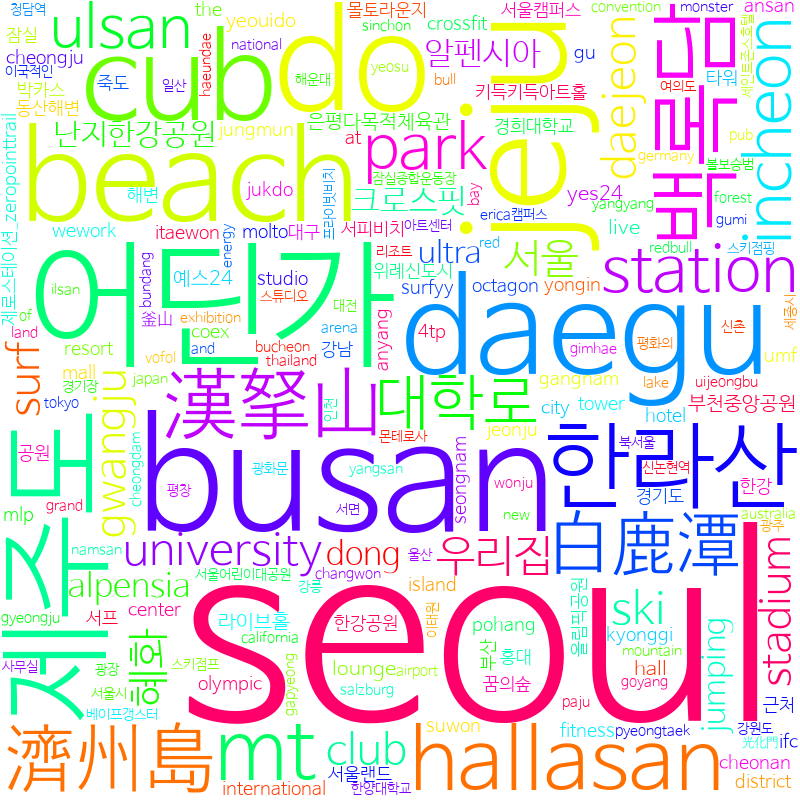

In [47]:
cloud.to_image()

## - Embedding

- LSA

In [48]:
tdm.shape

(12970, 6522)

In [49]:
# one hot encoding
import numpy as np

one_hot = np.eye(tdm.shape[1])

In [50]:
words = cv.get_feature_names()
tokens = locates

In [51]:
%%time
doc = np.zeros((1, tdm.shape[1]))

for token in tokens:
    try:
        i = words.index(token)
        doc += one_hot[i]
    except ValueError:
        pass

Wall time: 2.17 s


In [52]:
%%time
svd = TruncatedSVD(n_components=1000)
svd.fit(tdm)

Wall time: 9.89 s


TruncatedSVD(algorithm='randomized', n_components=1000, n_iter=5,
             random_state=None, tol=0.0)

In [53]:
svd.components_.shape

(1000, 6522)

In [54]:
word_emb = svd.components_.T

In [55]:
indices = []
target = list(word_count.sort_values('빈도', ascending=False)['단어'][0:100])
for w in target:
    i = words.index(w)
    indices.append(i)
    print(w, i)

seoul 1569
busan 296
jeju 955
어딘가 4688
do 530
daegu 489
beach 205
제주도 5460
cub 473
한라산 6287
백록담 3550
hallasan 787
mt 1237
濟州島 2055
漢拏山 2053
白鹿潭 2058
station 1672
incheon 909
park 1372
대학로 2878
ulsan 1805
university 1819
우리집 5004
ski 1610
혜화 6392
daejeon 491
gwangju 762
surf 1698
서울 4005
club 422
stadium 1661
크로스핏 5908
alpensia 103
dong 535
알펜시아 4595
jumping 984
난지한강공원 2609
은평다목적체육관 5149
ultra 1806
라이브홀 3107
hall 785
예스24 4874
부천중앙공원 3730
live 1099
yes24 1939
lounge 1108
yeouido 1938
mall 1137
해변 6334
釜山 2067
resort 1479
박카스 3501
at 163
부산 3697
wework 1888
jukdo 982
molto 1215
몰토라운지 3379
죽도 5526
강남 2118
서프 4078
cheonan 372
octagon 1332
서피비치 4083
tower 1774
crossfit 469
coex 428
itaewon 933
위례신도시 5102
olympic 1340
경희대학교 2246
ifc 896
제로스테이션_zeropointtrail 5447
hotel 865
서울랜드 4021
공원 2313
꿈의숲 2572
international 924
jungmun 986
umf 1807
키득키득아트홀 5933
cheongju 376
fitness 634
suwon 1711
studio 1682
잠실 5333
ansan 126
경기도 2198
gu 739
서울캠퍼스 4057
근처 2494
홍대 6413
center 349
gangnam 670
올림픽공원 4945


In [56]:
word_emb = svd.components_.T

In [57]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name)

Wall time: 1min 26s


127

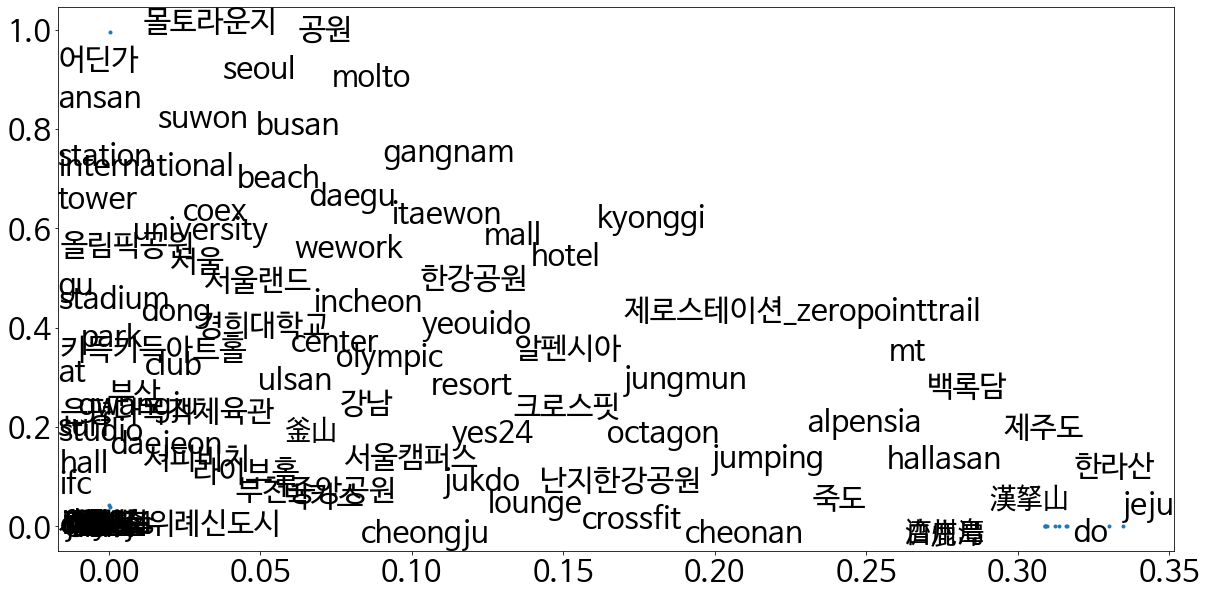

In [58]:
%%time

comp1 = 0
comp2 = 1

pyplot.rcParams["figure.figsize"] = (20,10)
pyplot.plot(word_emb[indices, comp1], word_emb[indices, comp2], '.')

texts = [pyplot.text(word_emb[i, comp1], word_emb[i, comp2], w) for i, w in zip(indices, target)]

adjust_text(texts)

- T-SNE

In [59]:
tsne = TSNE()

In [60]:
%%time
pos = tsne.fit_transform(word_emb)

Wall time: 4min 16s


90

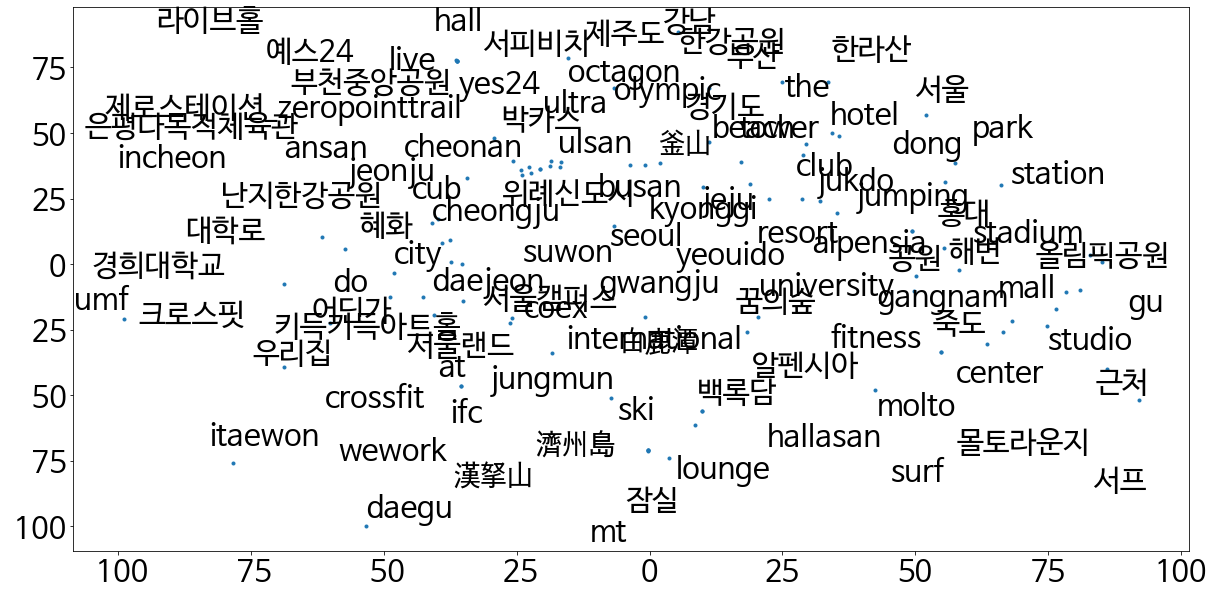

In [61]:
pyplot.rcParams["figure.figsize"] = (20,10)

pyplot.plot(pos[indices, 0], pos[indices, 1], '.')

texts = [pyplot.text(pos[i, 0], pos[i, 1], w) for i, w in zip(indices, target)]

adjust_text(texts)

- Word2Vec

In [62]:
sentences = list(df['Locates'])

In [63]:
model = Word2Vec(sentences, size = 1000, min_count = 20, workers = 4, window = 100)

In [64]:
%%time

word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

Wall time: 0 ns


In [65]:
%%time
pca = PCA(n_components = 2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

Wall time: 6.95 ms


In [66]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name, size = 30)

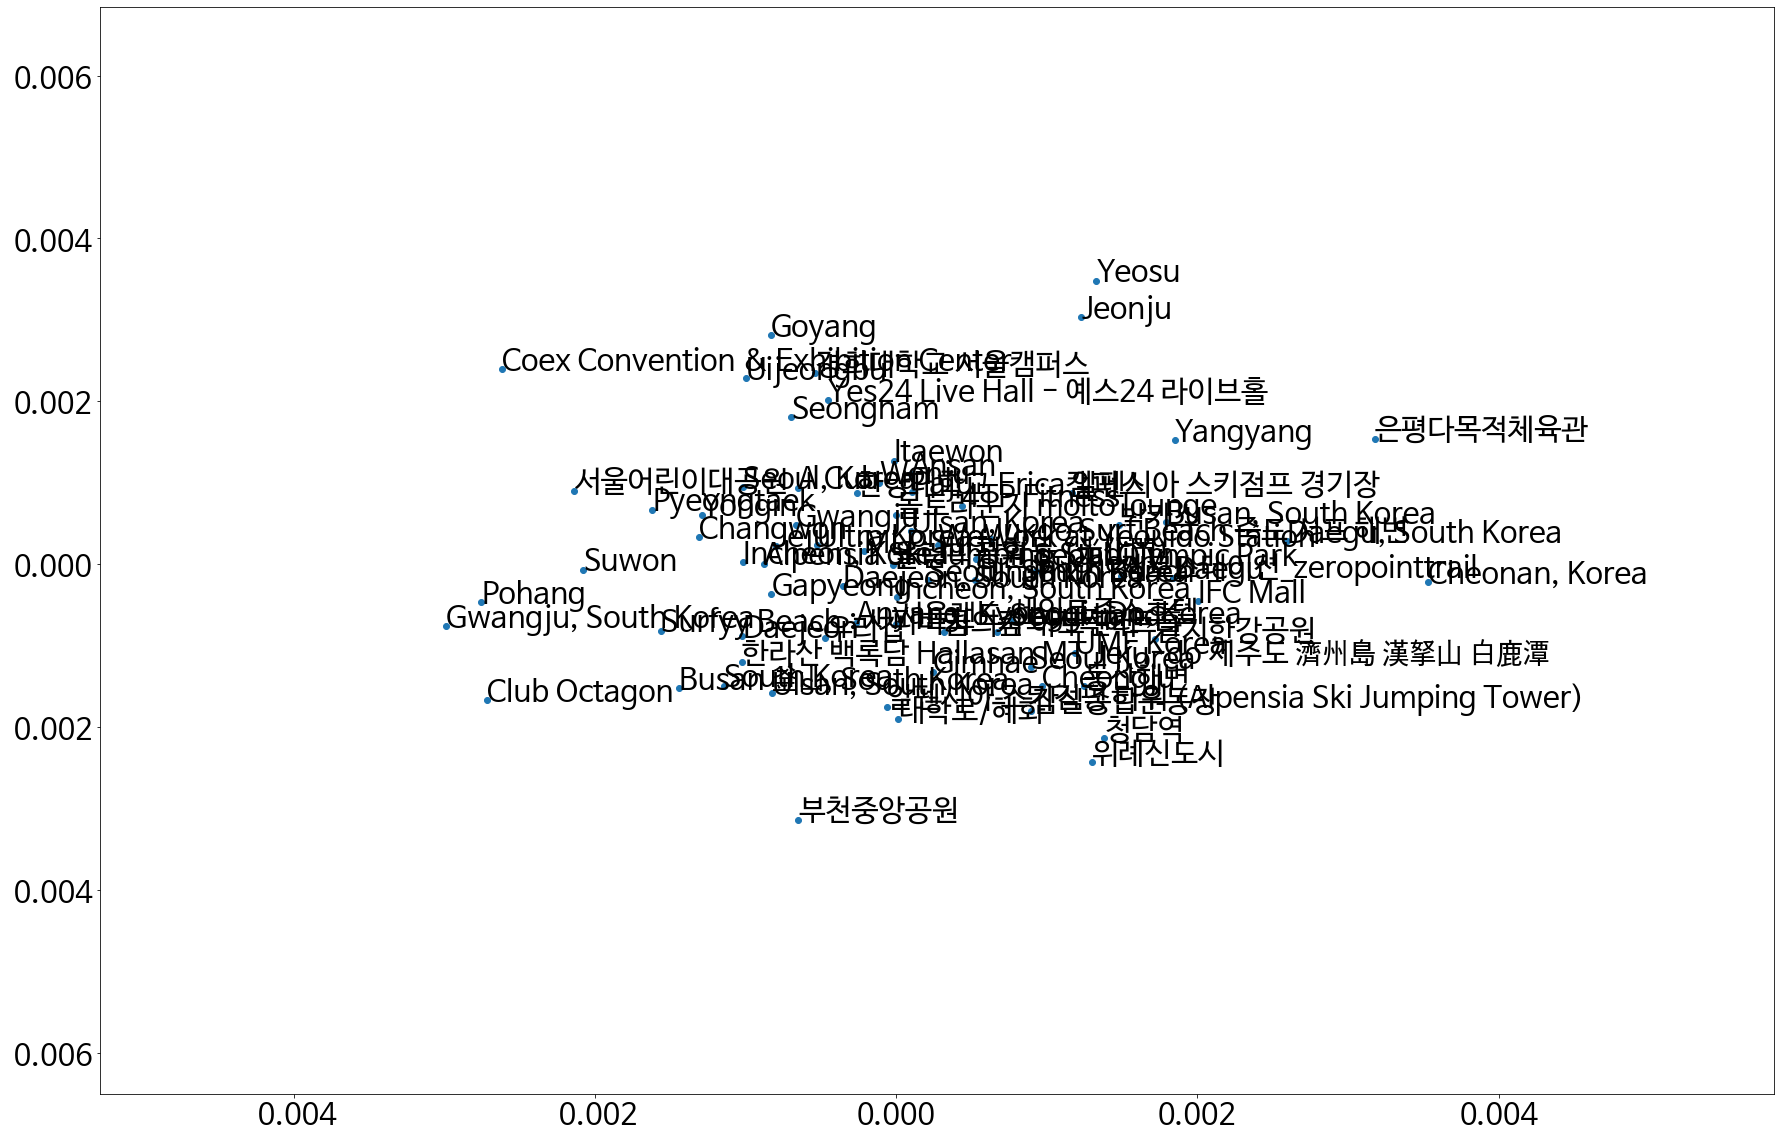

In [67]:
plt.rcParams['figure.figsize'] = [30, 20]
plt.scatter(xs, ys)
for i,v in enumerate(vocabs):
    plt.annotate(v, xy = (xs[i], ys[i]))